## 線形回帰スクラッチ

>線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。



In [1]:
import numpy as np

### 完成品

In [2]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    self.theta_ : 次の形のndarray, shape (self.theta_,)
      定数の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        # θとXを記録する配列を用意
        self.theta_ = np.empty(0)
        self.X_ = np.empty(0)
        
    def fit(self, X, y, alpha, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
            
        # 定数用のx＝１を作成。
        if self.X_.size == 0:
            ones_for_constant = np.ones(X.shape[0]).reshape(-1,1)
            self.X_ = np.concatenate([ones_for_constant.reshape(-1,1), X], axis=1)

        #  θ の用意
        if self.theta_.size == 0:
            # 特徴量の数
            n = self.X_.shape[1]
            self.theta_ = np.random.rand(n)
        
        error = self._error_calculation(self.X_, y)
        self._gradient_descent(self.X_, y, X_val, y_val, error, alpha)
    
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # 定数用のx＝１を作成。
        ones_for_constant = np.ones(X.shape[0]).reshape(-1,1)
        X = np.concatenate([ones_for_constant.reshape(-1,1), X], axis=1)

        # 仮定関数の出力が推定結果
        pred = np.sum(self.theta_.T*X, axis=1).reshape(-1,1)
        
        return pred
    
    
    def _linear_hypothesis(self, X, comment=False):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        # 定数用のx＝１を作成。
        if self.X_.size == 0:
            ones_for_constant = np.ones(X.shape[0]).reshape(-1,1)
            self.X_ = np.concatenate([ones_for_constant.reshape(-1,1), X], axis=1)
        
        #  θ の用意
        if self.theta_.size == 0:
            # 特徴量の数
            n = self.X_.shape[1]
            # θ の用意
            self.theta_ = np.random.rand(n)
        
        if comment:
            print("Xの値:\n{}".format(self.X_))
            print("Xの形:　{}".format(self.X_.shape))
            print("θの値: {}".format(self.theta_))
            print("θの形: {}".format(self.theta_.shape))
        
        h = np.sum(self.theta_.T*self.X_, axis=1).reshape(-1,1)
        
        return h
    
    
    def _gradient_descent(self, X, y, X_val, y_val, error, alpha = 0.01):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        loss_count = False
        
        if X_val is not None and y_val is not None:
            loss_count = True
        
        if loss_count:
            # 【問題５】
            # 定数用のx＝１を作成。
            ones_for_constant_val = np.ones(X_val.shape[0]).reshape(-1,1)
            X_val = np.concatenate([ones_for_constant_val.reshape(-1,1), X_val], axis=1)

            # 【問題５】
            # サンプル数
            m_val = X_val.shape[0]

            # 【問題５】
            # 誤差保管用リスト
            train_loss = []
            test_loss = []
        
        # サンプル数
        m = X.shape[0]
        
        for _ in range(self.iter):
            # 誤差の計算
            h = np.sum(self.theta_.T*X, axis=1).reshape(-1,1)
            train_error = h - y.reshape(-1,1)
            
            if loss_count:
                # 【問題５】
                h_test = np.sum(self.theta_.T*X_val, axis=1).reshape(-1,1)
                test_error = h_test - y_val.reshape(-1,1)
            
            # thetaの更新式
            # アダマール積 train_error*X.T ← shapeは（サンプル数, 特徴量＋１）
            self.theta_ = self.theta_ - alpha * np.sum(train_error*X, axis=0)/m#.T
            
            if loss_count:
                # 【問題５】
                train_loss.append(np.sum((train_error)**2, axis=0)/(2*m))
                test_loss.append(np.sum((test_error)**2, axis=0)/(2*m_val))
        
        if loss_count:
            # 【問題５】
            self.loss = np.array(train_loss)
            self.val_loss = np.array(test_loss)

        return self.theta_
    
    
    def _error_calculation(self, X, y):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """        
        #　仮定関数作成
        h = self._linear_hypothesis(X)
        
        # 仮定関数マイナス正解（すでに微分している形）
        error = h - y
        
        return error
    

In [3]:
# 検証用データ

# サンプル 4個　　特徴量　4 
X_q1 = np.array([[1,2], [3,4], [5,6], [7,8]])

# サンプル ５個　　特徴量　１   
# X_train = np.array([[1],[2],[3],[4],[5]])

# サンプル３個　特徴量　１ 
#X_train = np.array([[1], [2], [3]])

# サンプル３個　特徴量　２ 
X_train = np.array([[1,2], [3,4], [5,6]])

# サンプル４個　特徴量３
#X_train = np.array([[1,2,7], [3,4,8], [5,6,9], [10,11,12]])


# サンプル　１    
# y_train = np.array([1])

# サンプル　２ 
#y_train = np.array([0, 1])

# サンプル　３
y_train = np.array([0, 1, 0])

# サンプル　4
#y_train = np.array([[0], [1], [0], [0]])


# サンプル５個　特徴量　１    
# X_test = np.array([[1],[2],[3],[4],[5]])

# サンプル３個　特徴量　１ 
#X_test  = np.array([[1], [2], [3]])

# サンプル３個　特徴量２ 
X_test  = np.array([[2,1], [4,3], [6,5]])

# サンプル４個　特徴量３
#X_test  = np.array([[1,2,7], [3,4,8], [5,6,9], [10,11,12]])


# サンプル　１    
#y_test  = np.array([1])

# サンプル　２ 
#y_test  = np.array([0, 1])

# サンプル　３
y_test = np.array([1,0,1])


alpha = 0.03

## 【問題1】仮定関数
>以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。
>
>$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$
>
>x : 特徴量ベクトル
>
>θ : パラメータベクトル
>
>n : 特徴量の数
>
>xj : j番目の特徴量
>
>θj : j番目のパラメータ（重み）
>
>特徴量の数nは任意の値に対応できる実装にしてください。
>
>なお、ベクトル形式で表すと以下のようになります。
>
>$
h_\theta(x) = \theta^T \cdot x.
$


In [4]:
# 【問題１】
# __init__ に self.theta_ = np.empty(0)、self.X_ = np.empty(0) を追加して初期化
# _linear_hypothesis 内にて self.X_ が空白の場合に 先頭行に １ を追加するように作成

# 適当にインスタンス化
Liner_1 = ScratchLinearRegression(10,2,True,True)

h_return = Liner_1._linear_hypothesis(X_q1, comment=True)

# h の要素数はサンプル数と等しい
print("hの値:\n{}".format(h_return))
print("hの形: {}".format(h_return.shape))


Xの値:
[[1. 1. 2.]
 [1. 3. 4.]
 [1. 5. 6.]
 [1. 7. 8.]]
Xの形:　(4, 3)
θの値: [0.96186366 0.28029464 0.45134958]
θの形: (3,)
hの値:
[[2.14485747]
 [3.60814592]
 [5.07143437]
 [6.53472282]]
hの形: (4, 1)


## 【問題2】最急降下法  
>最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。
>
>$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$
>
>i : サンプルのインデックス  
>j : 特徴量のインデックス  
>
>ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。  
>雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

In [5]:
# 誤差の計算を行う_error_calculation()メソッドを作成し、fitメソッドから呼び出した上で
# _gradient_descent メソッドの引数として使用。
# _gradient_descent 関数にて、_linear_hypothesis メソッドを用いて h(x) を求め、
# y との誤差を計算(train_error)。更新式へ入力して thetaを更新。

# インスタンス化
Liner = ScratchLinearRegression(10,2,True,True)

Liner.fit(X_train, y_train, alpha=alpha)

## 【問題3】推定  

>推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。
>
>仮定関数 hθ(x) の出力が推定結果です。

In [6]:
# predictメソッドを作成。テストデータを引数として受けて学習したthetaを用いて推定値を算出

# testデータを与えて推測
y_pred = Liner.predict(X_test)
print("推定値:\n{}".format(y_pred))

推定値:
[[ 0.02815873]
 [-0.04558904]
 [-0.11933682]]


## 【問題4】平均二乗誤差  

>線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。
>
>平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。
>
>平均二乗誤差は以下の数式で表されます。  
>
>$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$
>
>m : 入力されるデータの数
>
>hθ() : 仮定関数
>
>x(i) : i番目のサンプルの特徴量ベクトル
>
>y(i) : i番目のサンプルの正解値
>
>なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）



In [7]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    #print(y.shape)
    m = y.shape[0]
    #print(m)
    #print((y_pred - y.reshape(-1,1))**2/3)
    mse = np.sum((y_pred - y.reshape(-1,1))**2, axis=0)/m
    #mse = sum((y_pred - y)**2)/m

    return mse

print()

print("平均二乗誤差: {}".format(MSE(y_pred, y_test)))


平均二乗誤差: [0.73315624]


## 【問題5】目的関数  

>以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。
>
>目的関数（損失関数） J(θ) は次の式です。
>
>$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$
>
>m  : 入力されるデータの数
>
>hθ() : 仮定関数
>
>x(i) : i番目のサンプルの特徴量ベクトル
>
>y(i) : i番目のサンプルの正解値

In [8]:
# _gradient_descentメソッドに誤差ログ保管用のコードを追記

# 新規にインスタンス化
Liner_5 = ScratchLinearRegression(10,2,True,True)

# fitメソッド実行
Liner_5.fit(X_train, y_train, alpha=alpha, X_val=X_test, y_val=y_test)

In [9]:
print("目的関数（損失関数）　トレーニングデータ:\n{}".format(Liner_5.loss))
print("目的関数（損失関数）　テストデータ:\n{}".format(Liner_5.val_loss))

目的関数（損失関数）　トレーニングデータ:
[[17.71989882]
 [ 0.19195007]
 [ 0.11155854]
 [ 0.11118865]
 [ 0.1111858 ]
 [ 0.11118464]
 [ 0.11118351]
 [ 0.11118239]
 [ 0.1111813 ]
 [ 0.11118022]]
目的関数（損失関数）　テストデータ:
[[15.06686813]
 [ 0.12286275]
 [ 0.15884253]
 [ 0.16604711]
 [ 0.1665214 ]
 [ 0.16651845]
 [ 0.16648339]
 [ 0.16644644]
 [ 0.16640965]
 [ 0.16637315]]


## 【問題6】学習と推定  
>機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。
>scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [10]:
import pandas as pd

In [11]:
# データセットcsvをpandasに読み込む

csv_path = "./Kaggle_data/train.csv" # ファイル名（パス）を指定する
df_data = pd.read_csv(csv_path)

# 条件に従って抜き出し
df_X = df_data[['GrLivArea', 'YearBuilt']]
df_y = df_data['SalePrice']

df = pd.concat([df_X, df_y], axis=1)

display(df)


# 特徴量（説明変数）をX_h、正解（目的変数）をy_hというndarrayに格納

X_h = np.array(df[['GrLivArea','YearBuilt']])
y_h = np.array(df['SalePrice'])

print(X_h)
print(y_h)


,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


[[1710 2003]
 [1262 1976]
 [1786 2001]
 ...
 [2340 1941]
 [1078 1950]
 [1256 1965]]
[208500 181500 223500 ... 266500 142125 147500]


In [12]:
from sklearn.model_selection import train_test_split

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=0.25, random_state=0)

print(X_train_h.shape)
print(y_train_h.shape)
print(X_test_h.shape)
print(y_test_h.shape)

(1095, 2)
(1095,)
(365, 2)
(365,)


In [13]:
from sklearn.preprocessing import StandardScaler

# 標準化を実施
scaler = StandardScaler()
scaler.fit(X_train_h)
X_train_scaled_h = scaler.transform(X_train_h)
X_test_scaled_h = scaler.transform(X_test_h)

In [14]:
# 新規にインスタンス化
Liner_6 = ScratchLinearRegression(10000,2,True,True)

Liner_6.fit(X_train_scaled_h, y_train_h, alpha=0.01, X_val=X_test_scaled_h, y_val=y_test_h)

In [15]:
# 自作関数による推定
y_pred_h = Liner_6.predict(X_test_scaled_h)
#print("推定値:\n{}".format(y_pred_h))

In [16]:
# 自作関数による平均二乗誤差
print("平均二乗誤差: {}".format(MSE(y_pred_h, y_test_h)))

平均二乗誤差: [2.7259081e+09]


In [17]:
# 線形回帰で学習させる
from sklearn.linear_model import LinearRegression

linear_sk = LinearRegression()# インスタンス化
linear_sk.fit(X_train_scaled_h, y_train_h)# 学習
y_pred_sk = linear_sk.predict(X_test_scaled_h)# 予測

In [18]:
# 平均二乗誤差（Mean Squared Error, MSE）
    
from sklearn.metrics import mean_squared_error
sk_mse = mean_squared_error(y_test_h, y_pred_sk)
print("平均二乗誤差(scikt-learn): {}".format(sk_mse))

平均二乗誤差(scikt-learn): 2725908099.063638


自作関数の平均２乗誤差はscikt-learnの結果とほぼ同様の値が得られた。

#### 可視化  
(参照) https://qiita.com/tomoshi0809/items/04563d8f1572290e99b3

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def graph_2d(df1, df2, df3, t1, t2, t3, title, change=False):
    
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.set_title(title)
    ax.set_xlabel(t1)
    ax.set_ylabel(t2)
    ax.set_zlabel(t3)

    x_df = df1.copy()
    y_df = df2.copy()
    z_df = df3.copy()
    
    ax.scatter(x_df , y_df, z_df)

    x_count = 1000
    
    if not change:
        x_size_min = 1000
        x_size_max = 5000
        y_size_min = 1880
        y_size_max = 2000
       
    else:
        x_size_min = 1880
        x_size_max = 2000
        y_size_min = 1000
        y_size_max = 5000
        
    X, Y = np.meshgrid(np.linspace(x_size_min, x_size_max, x_count), np.linspace(y_size_min, y_size_max, x_count))
    

    # sklearnのStandardScaler()から平均と分散を取得して手書きで標準化
    std_mean = scaler.mean_
    std_var = scaler.var_
    standard = np.sqrt(std_var)
    
    b = Liner_6.theta_[0] #切片
    
    if not change:
        X_scaled = (X - std_mean[0])/standard[0]
        Y_scaled = (Y - std_mean[1])/standard[1]

        a1, a2 = Liner_6.theta_[1], Liner_6.theta_[2] #係数

    else:
        
        X_scaled = (X - std_mean[1])/standard[1]
        Y_scaled = (Y - std_mean[0])/standard[0]

        a1, a2 = Liner_6.theta_[2], Liner_6.theta_[1] #係数
    
    Z = a1 * X_scaled + a2 * Y_scaled + b

    ax.plot_surface(X, Y, Z, color='c', alpha = 0.5) #alphaで透明度を指定

    plt.show()

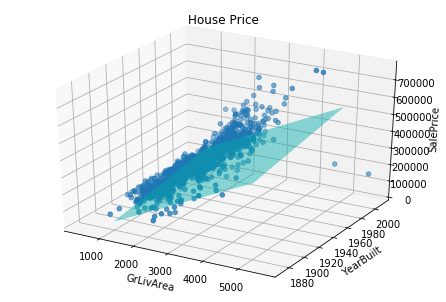

In [20]:

graph_2d(df["GrLivArea"], df["YearBuilt"], df["SalePrice"], "GrLivArea", "YearBuilt", "SalePrice", "House Price")


見にくいので軸を入れ替え。

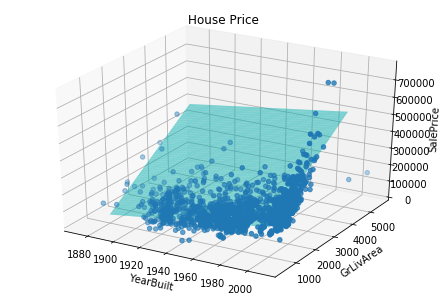

In [21]:

graph_2d(df["YearBuilt"], df["GrLivArea"], df["SalePrice"], "YearBuilt", "GrLivArea", "SalePrice", "House Price", change=True)


#### 検証　対数変換するとどうなるか

  対数変換をして正規分布に近づけてから行うと良いと聞いたので比較したい。

In [22]:
display(df)

# numpy の自然対数をapplyにて各列に適用
House_log = df.apply(np.log)

# 特徴量（説明変数）をX_h、正解（目的変数）をy_hというndarrayに格納

X_h_log  = np.array(House_log[['GrLivArea','YearBuilt']])
y_h_log  = np.array(House_log['SalePrice'])

print(X_h_log )
print(y_h_log )

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


[[7.44424865 7.60240134]
 [7.14045304 7.58882988]
 [7.48773376 7.60140233]
 ...
 [7.75790621 7.57095858]
 [6.98286275 7.57558465]
 [7.13568735 7.58324752]]
[12.24769432 12.10901093 12.31716669 ... 12.49312952 11.86446223
 11.90158345]


In [23]:
X_train_h_log, X_test_h_log, y_train_h_log, y_test_h_log = train_test_split(X_h_log, y_h_log, test_size=0.25, random_state=0)

print(X_train_h_log.shape)
print(y_train_h_log.shape)
print(X_test_h_log.shape)
print(y_test_h_log.shape)

(1095, 2)
(1095,)
(365, 2)
(365,)


In [24]:
scaler_log = StandardScaler()
scaler_log.fit(X_train_h_log)
X_train_scaled_h_log = scaler_log.transform(X_train_h_log)
X_test_scaled_h_log = scaler_log.transform(X_test_h_log)

In [25]:
# 新規にインスタンス化
Liner_6_log = ScratchLinearRegression(10000,2,True,True)

Liner_6_log.fit(X_train_scaled_h_log, y_train_h_log, alpha=0.01, X_val=X_test_scaled_h_log, y_val=y_test_h_log)


In [26]:
y_pred_h_log = Liner_6_log.predict(X_test_scaled_h_log)

In [27]:
# 自作関数による平均二乗誤差
print("平均二乗誤差: {}".format(MSE(y_pred_h_log, y_test_h_log)))

平均二乗誤差: [0.0444092]


In [28]:
linear_sk_log = LinearRegression()# インスタンス化
linear_sk_log.fit(X_train_scaled_h_log, y_train_h_log)# 学習
y_pred_sk_log = linear_sk_log.predict(X_test_scaled_h_log)# 予測

In [29]:
# 平均二乗誤差（Mean Squared Error, MSE）
    
from sklearn.metrics import mean_squared_error
sk_mse_log = mean_squared_error(y_test_h_log, y_pred_sk_log)
print("平均二乗誤差(scikt-learn): {}".format(sk_mse_log))

平均二乗誤差(scikt-learn): 0.04440920331075524


対数変換を実施したところ、平均２乗誤差はほぼ一致した。  
線形回帰の場合は、学習回数が十分に得られればあまり変わらないように思われた。

## 【問題7】学習曲線のプロット  
>学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。
>線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

In [30]:
import matplotlib.pyplot as plt

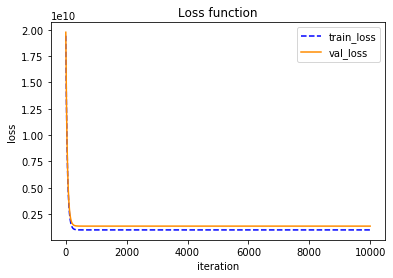

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.set_title('Loss function')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
 
ax.plot(Liner_6.loss, 'k--', color='b', label='train_loss')
ax.plot(Liner_6.val_loss, 'k', color='darkorange', label='val_loss')
 
ax.legend(loc='best')

## 【問題8】（アドバンス課題）バイアス項の除去  
>バイアス項 θ<sub>0</sub> を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。


先ほど作成したクラスから、特徴量Xへ’１’の列を足す処理を除外する。

In [32]:
class ScratchLinearRegression_non_bias():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    self.theta_ : 次の形のndarray, shape (self.theta_,)
      定数の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        # θとXを記録する配列を用意
        self.theta_ = np.empty(0)
        self.X_ = np.empty(0)
        
    def fit(self, X, y, alpha, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
            
        # Xを保管
        if self.X_.size == 0:
            self.X_ = X
            
        #  θ の用意
        if self.theta_.size == 0:
            # 特徴量の数
            n = self.X_.shape[1]
            self.theta_ = np.random.rand(n)
        
        error = self._error_calculation(self.X_, y)
        self._gradient_descent(self.X_, y, X_val, y_val, error, alpha)
    
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # 仮定関数の出力が推定結果
        pred = np.sum(self.theta_.T*X, axis=1).reshape(-1,1)
        #pred = np.dot(self.theta_.T, X).reshape(-1,1)
        
        return pred
    
    
    def _linear_hypothesis(self, X, comment=False):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        # Xを保管
        if self.X_.size == 0:
            self.X_ = X
        
        #  θ の用意
        if self.theta_.size == 0:
            # 特徴量の数
            n = self.X_.shape[1]

            # θ の用意
            self.theta_ = np.random.rand(n)
                    
        if comment:
            print("Xの値:\n{}".format(self.X_))
            print("Xの形:　{}".format(self.X_.shape))
            print("θの値: {}".format(self.theta_))
            print("θの形: {}".format(self.theta_.shape))
        
        h = np.sum(self.theta_.T*self.X_, axis=1).reshape(-1,1)
        
        return h
    
    
    def _gradient_descent(self, X, y, X_val, y_val, error, alpha = 0.01):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        loss_count = False
        
        if X_val is not None and y_val is not None:
            loss_count = True
        
        if loss_count:
            # 【問題５】
            # サンプル数
            m_val = X_val.shape[0]

            # 【問題５】
            # 誤差保管用リスト
            train_loss = []
            test_loss = []
        
        # サンプル数
        m = X.shape[0]
        
        for _ in range(self.iter):
            # 誤差の計算
            h = np.sum(self.theta_.T*X, axis=1).reshape(-1,1)
            train_error = h - y.reshape(-1,1)
            
            if loss_count:
                # 【問題５】
                h_test = np.sum(self.theta_.T*X_val, axis=1).reshape(-1,1)
                test_error = h_test - y_val.reshape(-1,1)
            
            # thetaの更新式
            # アダマール積 train_error*X.T ← shapeは（サンプル数, 特徴量＋１）
            self.theta_ = self.theta_ - alpha * np.sum(train_error*X, axis=0)/m#.T
            
            if loss_count:
                # 【問題５】
                train_loss.append(np.sum((train_error)**2, axis=0)/(2*m))
                test_loss.append(np.sum((test_error)**2, axis=0)/(2*m_val))
        
        if loss_count:
            # 【問題５】
            self.loss = np.array(train_loss)
            self.val_loss = np.array(test_loss)
            
        return self.theta_
    
    
    def _error_calculation(self, X, y):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """        
        #　仮定関数作成
        h = self._linear_hypothesis(X)
        
        # 仮定関数マイナス正解（すでに微分している形）
        error = h - y
        
        return error
    


In [33]:
# 新規にインスタンス化
Liner_8 = ScratchLinearRegression_non_bias(10000,2,True,True)

Liner_8.fit(X_train_scaled_h, y_train_h, alpha=0.01, X_val=X_test_scaled_h, y_val=y_test_h)


In [34]:
# 自作関数による推定
y_pred_h_8 = Liner_8.predict(X_test_scaled_h)


In [35]:
# 自作関数による平均二乗誤差
print("平均二乗誤差: {}".format(MSE(y_pred_h_8, y_test_h)))


平均二乗誤差: [3.60822525e+10]


#### 可視化

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def graph_2d_non_bias(df1, df2, df3, t1, t2, t3, title, change=False):
    
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.set_title(title)
    ax.set_xlabel(t1)
    ax.set_ylabel(t2)
    ax.set_zlabel(t3)

    x_df = df1.copy()
    y_df = df2.copy()
    z_df = df3.copy()
    
    ax.scatter(x_df , y_df, z_df)

    x_count = 1000
    
    if not change:
        x_size_min = 1000
        x_size_max = 5000
        y_size_min = 1880
        y_size_max = 2000
       
    else:
        x_size_min = 1880
        x_size_max = 2000
        y_size_min = 1000
        y_size_max = 5000
        
    X, Y = np.meshgrid(np.linspace(x_size_min, x_size_max, x_count), np.linspace(y_size_min, y_size_max, x_count))
    

    # sklearnのStandardScaler()から平均と分散を取得して手書きで標準化
    std_mean = scaler.mean_
    std_var = scaler.var_
    standard = np.sqrt(std_var)
    
    b = Liner_8.theta_[0] #切片
    
    if not change:
        X_scaled = (X - std_mean[0])/standard[0]
        Y_scaled = (Y - std_mean[1])/standard[1]

        a1, a2 = Liner_8.theta_[0], Liner_8.theta_[1] #係数

    else:
        
        X_scaled = (X - std_mean[1])/standard[1]
        Y_scaled = (Y - std_mean[0])/standard[0]

        a1, a2 = Liner_8.theta_[1], Liner_8.theta_[0] #係数
    
    Z = a1 * X_scaled + a2 * Y_scaled + b

    ax.plot_surface(X, Y, Z, color='c', alpha = 0.5) #alphaで透明度を指定

    plt.show()

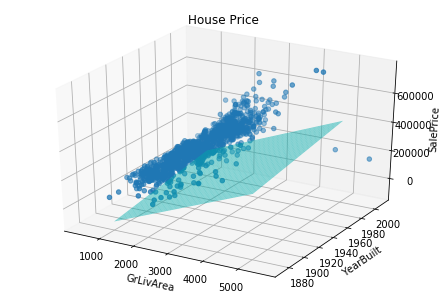

In [37]:

graph_2d_non_bias(df["GrLivArea"], df["YearBuilt"], df["SalePrice"], "GrLivArea", "YearBuilt", "SalePrice", "House Price")


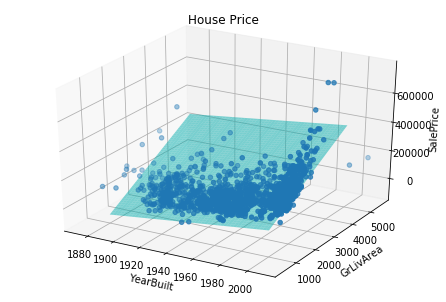

In [38]:

graph_2d_non_bias(df["YearBuilt"], df["GrLivArea"], df["SalePrice"], "YearBuilt", "GrLivArea", "SalePrice", "House Price", change=True)


バイアス項 θ<sub>0</sub> を省いて学習させた結果、平均二乗誤差はバイアスありが2.7259081e+09、  
バイアスなしが3.60822525e+10と精度が若干下がり、学習結果を可視化してみたところ、  
バイアスを省いた方は実データよりも低めの値で表示された。  
バイアス項は切片であり、すべての特徴量に対して原点を通る線で学習するため、  
柔軟な学習ができていないのではないかと思われる。



## 【問題9】（アドバンス課題）特徴量の多次元化  
>特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

#### 入力値を２乗

In [39]:
#2乗
X_train_h_square = np.square(X_train_h)
X_test_h_square = np.square(X_test_h)
y_train_h_square = np.square(y_train_h)
y_test_h_square = np.square(y_test_h)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler_9a = StandardScaler()
scaler_9a.fit(X_train_h_square)
X_train_scaled_h_square = scaler_9a.transform(X_train_h_square)
X_test_scaled_h_square = scaler_9a.transform(X_test_h_square)

In [41]:
# 新規にインスタンス化
Liner_9a = ScratchLinearRegression(10000,2,True,True)

Liner_9a.fit(X_train_scaled_h_square, y_train_h_square, alpha=0.01, X_val=X_test_scaled_h_square, y_val=y_test_h_square)


In [42]:
# 自作関数による推定
y_pred_h_square = Liner_9a.predict(X_test_scaled_h_square)
#print("推定値:\n{}".format(y_pred_h_square))


In [43]:
# 自作関数による平均二乗誤差
print(MSE(y_pred_h_square, y_test_h_square))


[1.3598133e+21]


#### 可視化

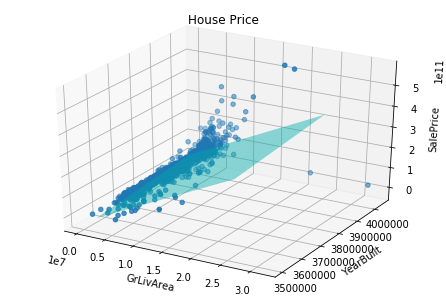

In [44]:
#２次元用グラフ

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.set_title("House Price")
ax.set_xlabel("GrLivArea")
ax.set_ylabel("YearBuilt")
ax.set_zlabel("SalePrice")

ax.scatter(df["GrLivArea"]**2,df["YearBuilt"]**2,df["SalePrice"]**2)

X, Y = np.meshgrid(np.arange(1000**2, 5000**2, 10000), np.arange(1880**2, 2000**2, 10000))

#対数変換
#X = np.log(X)
#Y = np.log(Y)

# sklearnのStandardScaler()から平均と分散を取得して手書きで標準化
std_mean = scaler_9a.mean_
std_var = scaler_9a.var_
standard = np.sqrt(std_var)
X_scaled = (X - std_mean[0])/standard[0]
Y_scaled = (Y - std_mean[1])/standard[1]

a1, a2 = Liner_9a.theta_[1], Liner_9a.theta_[2] #係数
b = Liner_9a.theta_[0] #切片

Z = a1 * X_scaled + a2 * Y_scaled + b

ax.plot_surface(X, Y, Z, color='c', alpha = 0.5) #alphaで透明度を指定

plt.show()



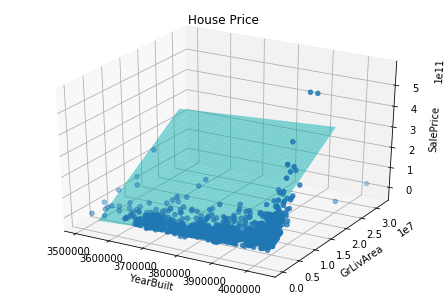

In [45]:
#２次元用グラフ

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.set_title("House Price")
ax.set_xlabel("YearBuilt")
ax.set_ylabel("GrLivArea")
ax.set_zlabel("SalePrice")

ax.scatter(df["YearBuilt"]**2,df["GrLivArea"]**2,df["SalePrice"]**2)

X, Y = np.meshgrid(np.arange(1880**2, 2000**2, 10000), np.arange(1000**2, 5000**2, 10000))

#対数変換
#X = np.log(X)
#Y = np.log(Y)

# sklearnのStandardScaler()から平均と分散を取得して手書きで標準化
std_mean = scaler_9a.mean_
std_var = scaler_9a.var_
standard = np.sqrt(std_var)
X_scaled = (X - std_mean[1])/standard[1]
Y_scaled = (Y - std_mean[0])/standard[0]

a1, a2 = Liner_9a.theta_[2], Liner_9a.theta_[1] #係数
b = Liner_9a.theta_[0] #切片

Z = a1 * X_scaled + a2 * Y_scaled + b

ax.plot_surface(X, Y, Z, color='c', alpha = 0.5) #alphaで透明度を指定

plt.show()

#### 入力値を３乗

In [46]:
#3乗
X_train_h_third = X_train_h**3
X_test_h_third = X_test_h**3
y_train_h_third = y_train_h**3
y_test_h_third = y_test_h**3

In [47]:
from sklearn.preprocessing import StandardScaler

scaler_9b = StandardScaler()
scaler_9b.fit(X_train_h_third)
X_train_scaled_h_third = scaler_9b.transform(X_train_h_third)
X_test_scaled_h_third = scaler_9b.transform(X_test_h_third)

In [48]:
# 新規にインスタンス化
Liner_9b = ScratchLinearRegression(10000,2,True,True)

Liner_9b.fit(X_train_scaled_h_third, y_train_h_third, alpha=0.01, X_val=X_test_scaled_h_third, y_val=y_test_h_third)


In [49]:
# 自作関数による推定
y_pred_h_third = Liner_9b.predict(X_test_scaled_h_third)
#print("推定値:\n{}".format(y_pred_h_third))

In [50]:
# 自作関数による平均二乗誤差
print(MSE(y_pred_h_third, y_test_h_third))


[6.81249505e+32]


#### 可視化

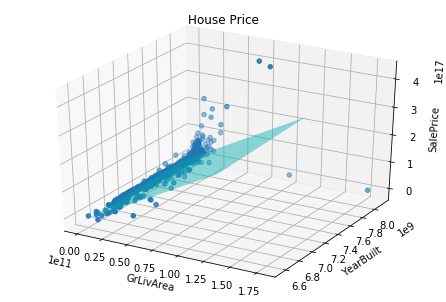

In [51]:
#３次元用グラフ

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.set_title("House Price")
ax.set_xlabel("GrLivArea")
ax.set_ylabel("YearBuilt")
ax.set_zlabel("SalePrice")

x_df = df["GrLivArea"]**3
y_df = df["YearBuilt"]**3
z_df = df["SalePrice"]**3

ax.scatter(x_df ,y_df ,z_df)


x_size_min = 1000**3
x_size_max = 5000**3
y_size_min = 1880**3
y_size_max = 2000**3


X, Y = np.meshgrid(np.arange(x_size_min, x_size_max, 100000000), np.arange(y_size_min, y_size_max, 100000000))

#対数変換
#X = np.log(X)
#Y = np.log(Y)

# sklearnのStandardScaler()から平均と分散を取得して手書きで標準化
std_mean = scaler_9b.mean_
std_var = scaler_9b.var_
standard = np.sqrt(std_var)
X_scaled = (X - std_mean[0])/standard[0]
Y_scaled = (Y - std_mean[1])/standard[1]

a1, a2 = Liner_9b.theta_[1], Liner_9b.theta_[2] #係数
b = Liner_9b.theta_[0] #切片

Z = a1 * X_scaled + a2 * Y_scaled + b

ax.plot_surface(X, Y, Z, color='c', alpha = 0.5) #alphaで透明度を指定

plt.show()



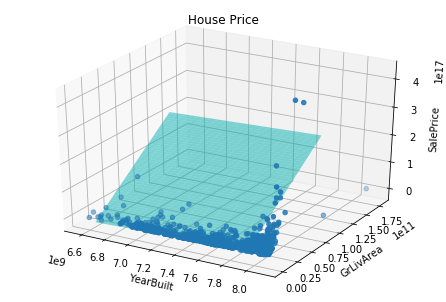

In [52]:
#３次元用グラフ

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.set_title("House Price")
ax.set_xlabel("YearBuilt")
ax.set_ylabel("GrLivArea")
ax.set_zlabel("SalePrice")



x_df = df["YearBuilt"]**3
y_df = df["GrLivArea"]**3
z_df = df["SalePrice"]**3
# ax.scatter(df["YearBuilt"]**2,df["GrLivArea"]**2,df["SalePrice"]**2)


ax.scatter(x_df ,y_df ,z_df)


x_size_min = 1880**3
x_size_max = 2000**3
y_size_min = 1000**3
y_size_max = 5000**3


X, Y = np.meshgrid(np.arange(x_size_min, x_size_max, 100000000), np.arange(y_size_min, y_size_max, 100000000))



#X, Y = np.meshgrid(np.arange(1880**3, 2000**3, 100000000), np.arange(1000**3, 5000**3, 100000000))

#対数変換
#X = np.log(X)
#Y = np.log(Y)

# sklearnのStandardScaler()から平均と分散を取得して手書きで標準化
std_mean = scaler_9b.mean_
std_var = scaler_9b.var_
standard = np.sqrt(std_var)
X_scaled = (X - std_mean[1])/standard[1]
Y_scaled = (Y - std_mean[0])/standard[0]

a1, a2 = Liner_9b.theta_[2], Liner_9b.theta_[1] #係数
b = Liner_9b.theta_[0] #切片

Z = a1 * X_scaled + a2 * Y_scaled + b

ax.plot_surface(X, Y, Z, color='c', alpha = 0.5) #alphaで透明度を指定

plt.show()

入力データを２乗、３乗としてみたところ、平均二乗誤差については、入力値の桁自体が大きくなっているため大きな値に引っ張られて誤差がどんどん大きくなり、うまく比較できなかった。  

元データ ：　2.7259081e+09  
２乗 ：　1.3598133e+21  
３乗　：　6.81249505e+32  

可視化してみたところ、データ自体が指数関数的に上昇しているためか、  
累乗するごとに全体的に角度が上向いているように見える。  
しかし、大きな値に適応しているように見えるので、特に３乗になると小さい値に  
十分適用できているかは不明である。  

## 【問題10】（アドバンス課題）更新式の導出  
>最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

以下の線形回帰の式 h に任意のXを与えたとき、正解値yとhの誤差が最小になるθを求めることができた時に十分に学習できたと言える。  

$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$

yとhの誤差は数式で表すことができる。（マイナスを消すため２乗。微分後に計算しやすいよう1/2。）  

yとhの誤差　＝　１/２（hーy）＊＊２  


上記式を複数のサンプルがある場合にまでに展開し、各サンプルの平均を出すと以下の式になる（目的関数・損失関数）。  （サンプル数の合計をサンプル数で割る。）

$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$

この数式が最小値をとるとき（接線の傾きが０のとき）のθを求めたい。  
最初はθは乱数をとるので、θから目的変数Jの微分係数を引くいていくことで
最終的にθがもとまる。

各θの更新式は以下の通り。θの更新は現在のθから目的関数のθの偏微分を引くことで行う。  

$
\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\
$

目的関数を微分すると以下のようになる。  

$
(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}
$

また、θの更新率をαで表すことができる（学習率）。  
これは目的変数をθで微分するときの勾配を降下する率である。

学習率αを用いて、θjの微分を上記の目的関数の微分で置き換えると以下のようになる。 

$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$

以上

## 【問題11】（アドバンス課題）局所最適解の問題  
>最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

一般に局所最適解が発生するのは、目的関数が３次関数以上の複雑な式の場合のみであるが、   
線形回帰の目的関数は下に凸の２次関数であるため、必ず最小値を求めることができる。 

目的関数は以下の式で表される。  


$
L = \frac{1}{2n} \sum_{i=1}^{n} \bigr({y_i^2 - 2y_i(ax_i + b) + (ax_i + b)^2}\bigl) 
$


カッコ内をグラフにすると以下の通り。目的関数は下に凸の２次関数である。

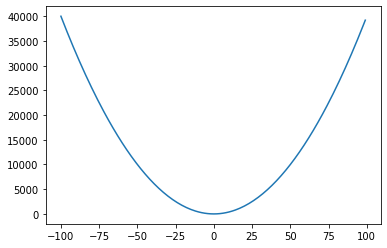

In [53]:
y = 2
a = 2
x = np.arange(-100, 100)
b = 2

J = y**2 - 2*y*(a*x + b)+(a*x + b)**2

plt.plot(x, J)

以上